In [1]:
import pandas as pd
from Models.LassoRegression import LassoRegression
from Models.RidgeRegression import RidgeRegression
from Models.RandomForestRegressor import RandomForestReg
from pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_9817/1924956038.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-14 19:12:10.875 | INFO     | preprocessing.abstract_prep:<module>:5 - Successfully imported 'abstract_prep' file
2024-03-14 19:12:10.876 | INFO     | preprocessing.check_nans:<module>:6 - Successfully imported 'CheckNans' file
2024-03-14 19:12:10.877 | INFO     | preprocessing.minmax_scaler:<module>:7 - Successfully imported 'MinMaxScaler' file


In [13]:
data = pd.read_csv("Data/cleaned_data.csv")
models = [
    (LassoRegression("LassoReg", alpha=0.00001, max_iter=60, selection="cyclic",random_state=42),'LassoRegression'), ]
    # (RandomForestReg('RandomForestRegressor', n_estimators=56, criterion='squared_error', max_depth= 10, min_samples_leaf=1, min_samples_split= 5,random_state=42),'RandomForestRegression'),
    # (RidgeRegression("RidgeRegression", alpha = 0.5, max_iter = 100, random_state=42), "RidgeRegression")
# ]
model_scores = []

for model, model_name in models:
    pipeline = Pipeline(data ,model)
    scores = pipeline.fit_transform()
    scores['Model'] = model_name
    model_scores.append(scores)
    
scores_df = pd.DataFrame(model_scores)
print(scores_df)

2024-03-14 19:15:28.239 | INFO     | pipeline:fit_transform:28 - Training the model
2024-03-14 19:15:28.246 | INFO     | pipeline:data_preprocessing:17 - Data Preprocessing
2024-03-14 19:15:28.247 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting


2024-03-14 19:15:28.249 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in dataframe
2024-03-14 19:15:28.249 | INFO     | preprocessing.minmax_scaler:fit:15 - _MinMaxScaler preprocessing class_ is fitting
2024-03-14 19:15:28.252 | INFO     | preprocessing.minmax_scaler:fit:18 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-14 19:15:28.254 | INFO     | preprocessing.minmax_scaler:fit:15 - _MinMaxScaler preprocessing class_ is fitting
2024-03-14 19:15:28.258 | INFO     | preprocessing.minmax_scaler:fit:18 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-14 19:15:28.258 | INFO     | preprocessing.minmax_scaler:transform:37 - _MinMaxScaler preprocessing class_ is starting transformation
2024-03-14 19:15:28.262 | INFO     | preprocessing.minmax_scaler:transform:40 - _MinMaxScaler preprocessing class_ transformation ended
2024-03-14 19:15:28.341 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outliers in dataframe: 50
2024-03-14

        MAE       MSE      RMSE        R2      MAPE            Model
0  0.041229  0.003578  0.059818  0.755966  0.078783  LassoRegression


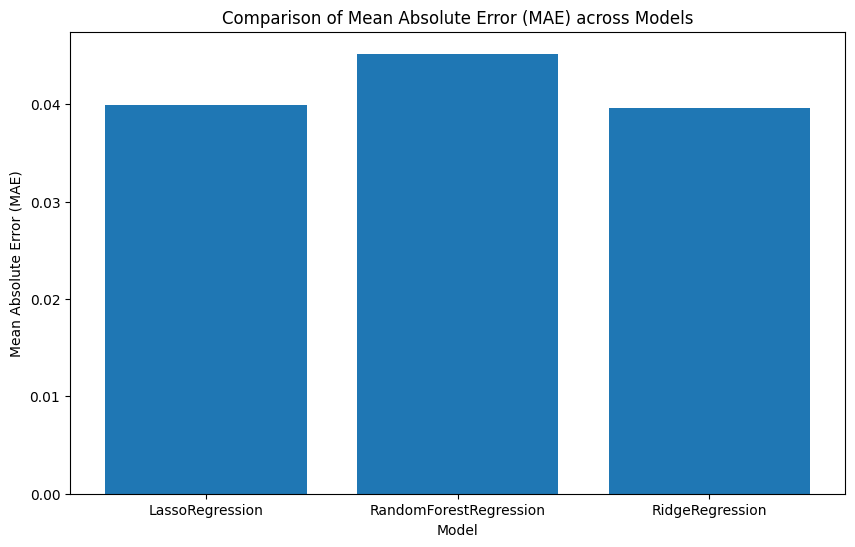

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['MAE'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.xticks(rotation=0)
plt.show()

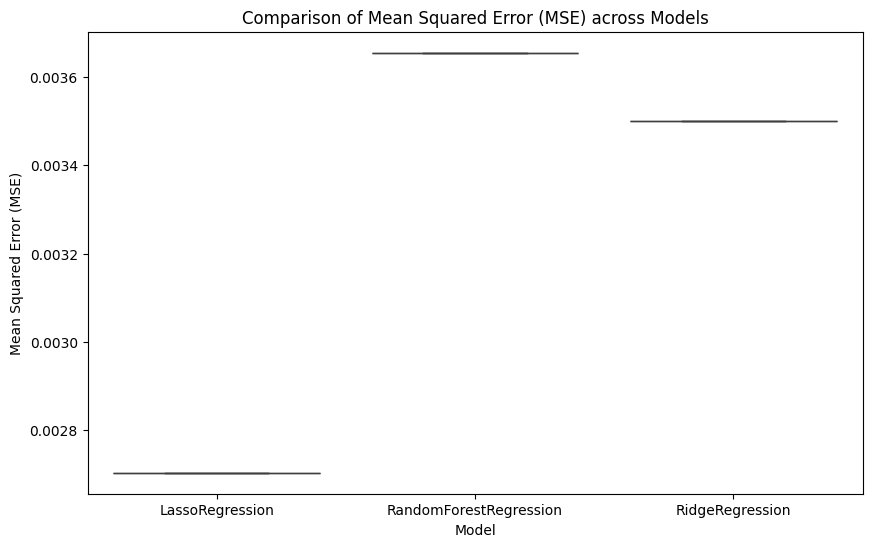

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Models')
plt.xticks(rotation=0)
plt.show()

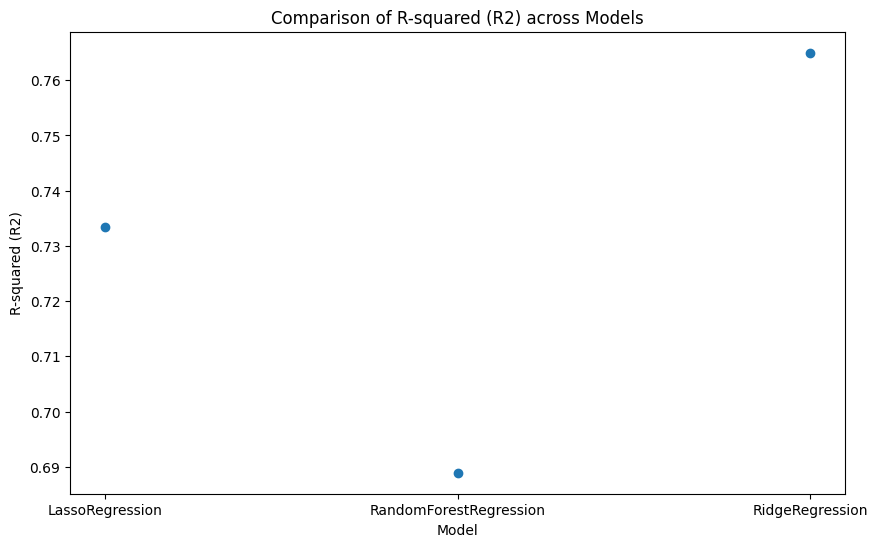

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(scores_df['Model'], scores_df['R2'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) across Models')
plt.xticks(rotation=0)
plt.show()

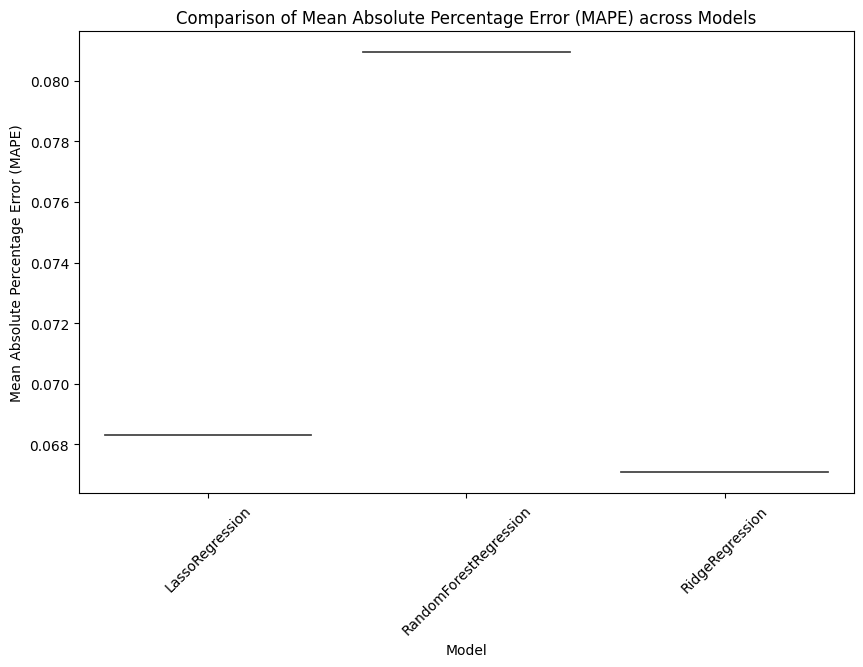

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='MAPE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Mean Absolute Percentage Error (MAPE) across Models')
plt.xticks(rotation=45)
plt.show()

In [7]:
model_scores

[{'MAE': 0.03996750098733937,
  'MSE': 0.0027026009910716274,
  'RMSE': 0.05198654625065631,
  'R2': 0.7335072234652436,
  'MAPE': 0.06832043201062239,
  'Model': 'LassoRegression'},
 {'MAE': 0.04518927576620664,
  'MSE': 0.0036555574310063984,
  'RMSE': 0.06046120600026432,
  'R2': 0.6889395179144948,
  'MAPE': 0.08093428741240513,
  'Model': 'RandomForestRegression'},
 {'MAE': 0.03957422791791787,
  'MSE': 0.0035003638470078053,
  'RMSE': 0.05916387281954931,
  'R2': 0.7649724319325799,
  'MAPE': 0.06707840424580148,
  'Model': 'RidgeRegression'}]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for scores, model_name in model_scores:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=scores, x='Score', kde=True, bins=20)
    plt.title(f'Histogram of Scores for {model_name}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


ValueError: too many values to unpack (expected 2)